In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Generation of RVs

Generation of three randoms variables (X, Y1, Y2)

X: Gaussian, $N(M_x=4, \sigma_x^2=25)$

2000 samples

Y1 = $aX+b+N_z(0, \sigma_z^2=1) * exp\{-(X-4)^2/50\}$ - (Eq.1)

a ≠ 0, b ≠ 0, set a and b as you wants

First, generate X, and then generate Y1

Y2 = $aX+b+N_z(0, \sigma_z^2=9) * exp\{-(X-4)^2/50\}$ - (Eq.1)

set a and b same with of Y1

First, generate X, and then generate Y2

In [22]:
sample = 20000
mean, sigma = 4, 5
X = np.random.normal(mean, sigma, sample)

In [21]:
a, b = 0.5, 4
nz_mean, nz_sig_1, nz_sig_2 = 0, 1, 5
Nz1 = np.random.normal(nz_mean, nz_sig_1, sample)
Nz2 = np.random.normal(nz_mean, nz_sig_2, sample)

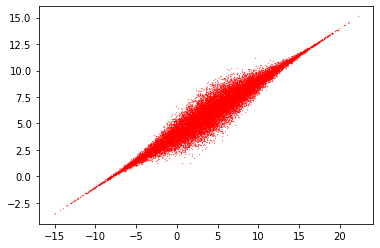

In [30]:
Y1 = a*X + b + Nz1 * np.exp(-(X-4)**2/50)

plt.scatter(X, Y1, c = 'red', s = 0.05)
plt.show()

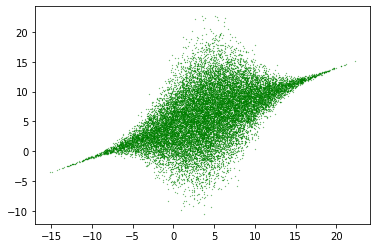

In [31]:
Y2 = a*X + b + Nz2 * np.exp(-(X-4)**2/50)

plt.scatter(X, Y2, c = 'green', s = 0.05)
plt.show()

## Finding Correlation

1) Finding correlation coefficients of X-Y1 and X-Y2

Compare and Analyze the two correlation coefficients

2) Repeat another a and b

Same with $\sigma_z^2=1$ and $\sigma_z^2=9$

Compare and Analyze the correlation coefficients with 1

Analysis 

What relation between correlation coefficients and noise variance ($\sigma_z^2$) ? 

What relation between lin models (a,b) and correlation coefficients ?

In [42]:
# Finding Correlation
# correlation coefficients 
y1_coef = np.corrcoef(X, Y1)[1, 0]
y2_coef = np.corrcoef(X, Y2)[1, 0]
# Covariance
y1_cov = np.cov(X, Y1)[0, 1]
y2_cov = np.cov(X, Y2)[0, 1]

In [43]:
f'y1 cor: {y1_coef}, cov: {y1_cov}'

'y1 cor: 0.9587542330951674, cov: 12.86101982783291'

In [44]:
f'y2 cor: {y2_coef}, cov: {y2_cov}'

'y2 cor: 0.5558511441691891, cov: 12.930793962523094'

## Estimation
Estimating Y1 when given an X for an (a, b)

1) First generate an X(200 samples), then calculate Y1 using Y1 = aX+b

2) Generate the Y1 using (Eq.1) for the same X as in 1)

Y2 = $aX+b+N_z(0, \sigma_z^2=9)* \exp\{-(X-4)^2/50\}$ - (Eq.2)

3) Calculate the mean squared difference between the estimated Y2 and generated Y2

In [45]:
li1 = (Nz1 * np.exp(-(X-4**2/50)))**2
sum = 0
for i in li1:
    sum += i
f'MSE eq1: {sum/sample}'

'MSE eq1: 3070348198.919643'

In [46]:
li2 = (Nz2 * np.exp(-(X-4)**2/50))**2
sum = 0
for i in li2:
    sum += i

f'MSE eq2 {sum/sample}'

'MSE eq2 14.545100367178998'